# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load the data
data = pd.read_csv('uni_admission.csv')

#displaying the dataset
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [0]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

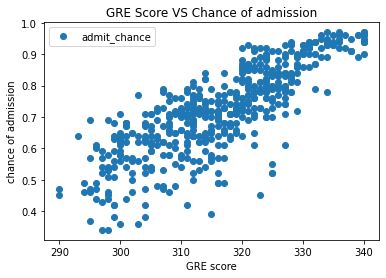

In [0]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [0]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)



This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(f" Intercept: {regressor.intercept_}")

#display the coefficient
print(f" Coefficient: {regressor.coef_}")

 Intercept: -2.5488126924084584
 Coefficient: [0.01033718]


*How* good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [0]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

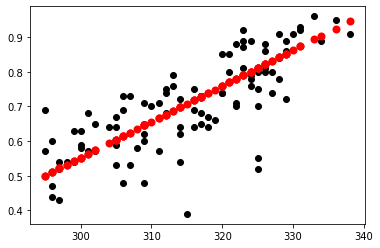

In [0]:
plt.scatter(GRE_test, admit_test, color='black')
plt.scatter(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [0]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



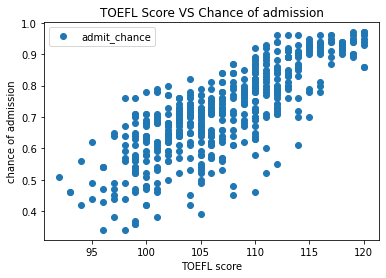

In [0]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [0]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [0]:
regressor.coef_


array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [0]:
y_pred = regressor.predict(X_test)
print(f"Predictions: {y_pred}")

Predictions: [0.72245887 0.81111211 0.78508404 0.87336925 0.57869957 0.6881228
 0.55077851 0.65452279 0.53568747 0.75227292 0.69001578 0.71793684
 0.66209472 0.71641189 0.92053534 0.50098337 0.78923803 0.71604386
 0.79113102 0.59831264 0.51418142 0.71793684 0.53794849 0.89261428
 0.78282302 0.75716297 0.83677216 0.60814559 0.59342258 0.58059255
 0.68360077 0.52059643 0.61340367 0.78923803 0.69453781 0.55077851
 0.80396104 0.82168112 0.57228456 0.65378673 0.70547485 0.86243221
 0.88619927 0.74433295 0.83225013 0.76962497 0.93147238 0.86053922
 0.70810389 0.69679883 0.61945065 0.64058867 0.61303564 0.81942011
 0.65604774 0.83866514 0.53153347 0.81526611 0.63038769 0.65830875
 0.48589233 0.85375618 0.64321772 0.79791406 0.74622594 0.63680271
 0.76736395 0.84318717 0.51381339 0.86243221 0.88393826 0.81942011
 0.69264483 0.71604386 0.77866902 0.92884334 0.80206806 0.75679494
 0.52701145 0.66398771 0.66472377 0.81715909 0.56360853 0.66661675
 0.84092616 0.5485175  0.79376006 0.64737172 0.559

In [0]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.708793
std,0.13282,0.115286
min,0.39000,0.485892
25%,0.60000,0.618885
50%,0.70500,0.701137
75%,0.80000,0.798953
max,0.96000,0.950717


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [0]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.058487235725409016
Mean Squared Error: 0.006246893942643228
Root Mean Squared Error: 0.07903729463135253


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



In [0]:
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
data.columns

Index(['Serial No.', 'GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA',
       'publications', 'admit_chance'],
      dtype='object')

In [0]:
test_scores = data[['GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA','publications']]
label = data['admit_chance']

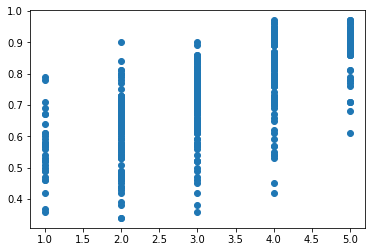

In [0]:
# Scatter plot between uni rating score and Admit chance score.
#
fig = plt.plot()
plt.scatter(data['uni_rating'], data['admit_chance'])
plt.show()

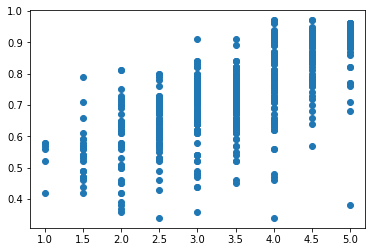

In [0]:
# Scatter plot between SOP score and Admit chance score.
#
fig = plt.plot()
plt.scatter(data['SOP'], data['admit_chance'])
plt.show()

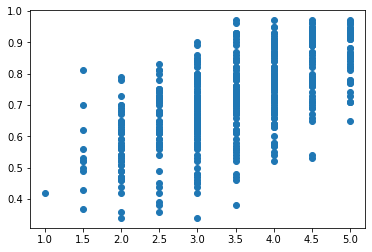

In [0]:
# Scatter plot between LOR score and Admit chance score.
#
fig = plt.plot()
plt.scatter(data['LOR'], data['admit_chance'])
plt.show()

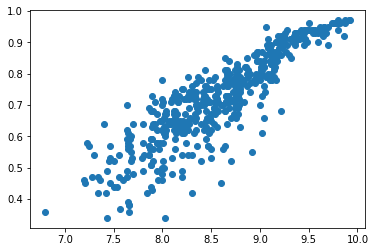

In [0]:
# Scatter plot between CGPA and Admit chance score.
#
fig = plt.plot()
plt.scatter(data['CGPA'], data['admit_chance'])
plt.show()

In [0]:
# Assigning our features and Labels
#
X = data[['GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA', 'publications']]
y = data['admit_chance']

In [0]:
# training using 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

regressor = LinearRegression()

#Fitting our Model with training data.
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Checking what coefficients our regression model has chosen
#
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
GRE,0.001686
TOEFL,0.003399
uni_rating,0.007452
SOP,-0.000124
LOR,0.015859
CGPA,0.113161
publications,0.026927


In this case, we can see that a single point change in your CGPA score would influence your chances slightly more than a similar 1 point change in the other subject scores. 

Let's compare our predicted results to the actual data from the test set:

In [0]:
# Predicting the admission score based on our features
#
y_pred = regressor.predict(X_test)

print(f" Predicted Admission Score:\n -------------------------------\n {y_pred}")

 Predicted Admission Score:
 -------------------------------
 [0.85201331 0.51457685 0.85832401 0.81304481 0.81130805 0.85193273
 0.64635471 0.73102988 0.73833815 0.78112264 0.73682437 0.63354377
 0.74454705 0.78920404 0.76027099 0.83661774 0.70937851 0.84857968
 0.95663563 0.84182506 0.75830589 0.5966742  0.51593342 0.68303558
 0.90503437 0.5038512  0.47957356 0.88881192 0.84977071 0.62078236
 0.69850983 0.80515886 0.76945874 0.78503306 0.65406313 0.56043195
 0.89547948 0.70311995 0.67559491 0.68012371 0.73206062 0.77580567
 0.82960143 0.85415792 0.77013685 0.90511691 0.49603509 0.71017649
 0.56605501 0.85655142 0.69615223 0.66563109 0.81835461 0.67737711
 0.80279874 0.72636839 0.77017873 0.74908518 0.60880666 0.59922648
 0.92047801 0.90621671 0.74626346 0.61788418 0.78026214 0.68734127
 0.83797021 0.54247735 0.84799351 0.8321828  0.7859102  0.78807538
 0.71547744 0.69694274 0.75004551 0.60180763 0.70753501 0.71004917
 0.69676715 0.6097257  0.76989428 0.51390344 0.56369369 0.73490288


#### Comparison between Actual data and the Prediction.

In [0]:
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,100.000000,100.000000
mean,0.744900,0.734395
std,0.131936,0.117993
min,0.370000,0.479574
25%,0.660000,0.652451
50%,0.760000,0.737581
75%,0.840000,0.830247
max,0.960000,0.964378


In [0]:
# calculating the Acurracy of our model.
#
from sklearn import metrics

# Model Accuracy implies how often is the classifier correct?
print(" Accuracy: ", regressor.score(X_test, y_test))

 Accuracy:  0.8702524953385049


# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/195gkZ5cTZL11L308MHc7EyBbAoiB4xqf/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [0]:
wine = pd.read_csv('winequality-red.csv')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
# Checking the size of our dataset
#
wine.shape

(1599, 12)

In [0]:
# Checking the null values of our dataset.
#
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [0]:

# Split the dataset into features and Labels
#
X = wine[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',\
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',\
            'sulphates', 'alcohol']]
y = wine['quality']

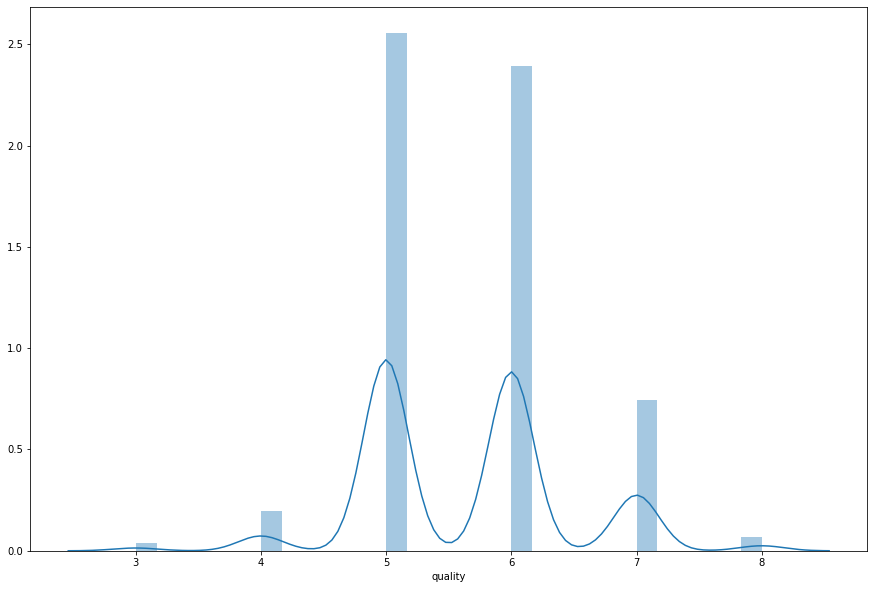

In [0]:
# Let's check the average value of the “quality” column.
#
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(wine['quality'])
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Training our model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Checking what coefficients our regression model has chosen
#
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
volatile acidity,-1.142528
citric acid,-0.097307
residual sugar,0.017703
chlorides,-2.033619
free sulfur dioxide,0.003096
total sulfur dioxide,-0.003062
density,-4.681093
pH,-0.473528
sulphates,0.892700
alcohol,0.290284


In [0]:
# Making predictions using our model
#
y_pred = regressor.predict(X_test)

In [0]:
# describing both our predicted and the acttual values.
#
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.667415
std,0.757796,0.492882
min,3.000000,4.691732
25%,5.000000,5.288706
50%,6.000000,5.606199
75%,6.000000,6.044560
max,8.000000,6.984363


In [0]:
# calculating the Acurracy of our model.
#
from sklearn import metrics

# Model Accuracy implies how often is the classifier correct?
print(" Accuracy: ", regressor.score(X_test, y_test))

 Accuracy:  0.33163398997414273


In [0]:
# Calculating the Root Mean Squared Error
#

print(f" Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f" Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f" Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

 Mean Absolute Error: 0.4679428865650719
 Mean Squared Error: 0.38261343269253667
 Root Mean Squared Error: 0.6185575419413595
